# Unsupervised Learning - Clustering (Heart Disease Dataset)

## Steps to Complete:
1. Apply K-Means Clustering (elbow method to determine K)
2. Perform Hierarchical Clustering (dendrogram analysis)
3. Compare clusters with actual disease labels

## Deliverable:
- Clustering models with visualized results


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded!")


Libraries loaded!


In [2]:
# Load preprocessed data (same as notebook 01)
print("Loading preprocessed data...")

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load data
df = pd.read_csv('../data/Heart_Disease.csv', names=column_names, na_values='?')
df_clean = df.dropna()  # Remove missing values

# Apply preprocessing (same as notebook 01)
categorical_columns = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# One-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, prefix=categorical_columns)

# Scale numerical features
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Create binary target (0: No disease, 1: Disease present)
df_encoded['target_binary'] = (df_encoded['target'] > 0).astype(int)

# Prepare features and target
feature_columns = [col for col in df_encoded.columns if col not in ['target', 'target_binary']]
X = df_encoded[feature_columns]
y = df_encoded['target_binary']

print(f"Data shape: {df_encoded.shape}")
print(f"Features for clustering: {X.shape}")
print("Data ready for clustering!")


Loading preprocessed data...
Data shape: (297, 27)
Features for clustering: (297, 25)
Data ready for clustering!


Step 1: Applying K-Means with Elbow Method...


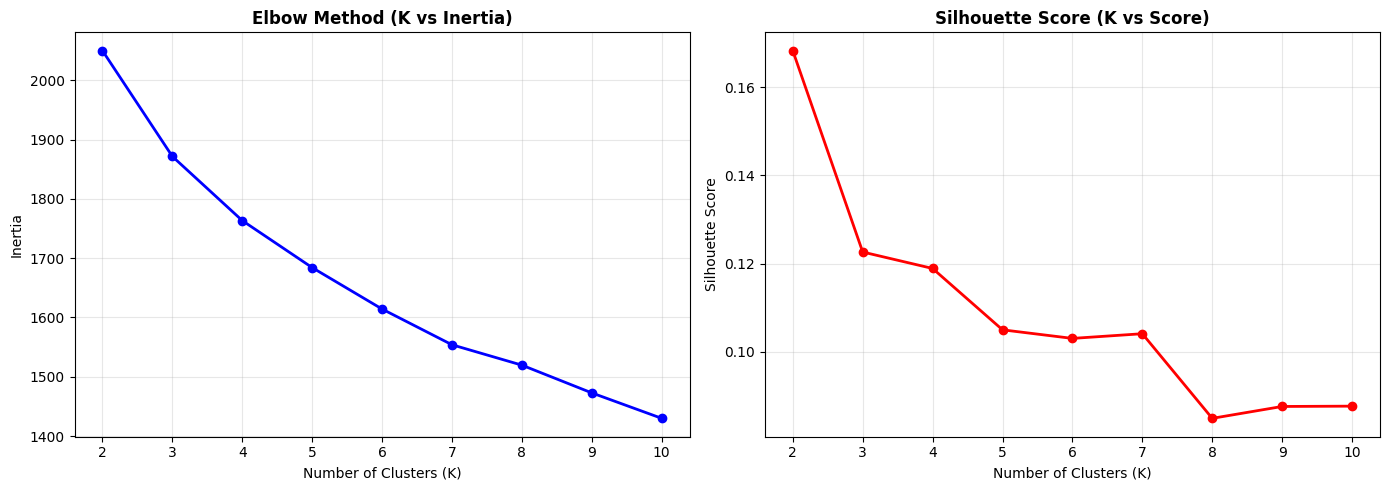

Optimal K (by silhouette): 2
K-Means clustering completed!


In [3]:
# Step 1: K-Means Clustering (Elbow Method)
print("Step 1: Applying K-Means with Elbow Method...")

inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# Plot Elbow Method and Silhouette Score
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(list(K_range), inertias, 'bo-', linewidth=2)
axes[0].set_title('Elbow Method (K vs Inertia)', fontweight='bold')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].grid(True, alpha=0.3)

# Silhouette Score
axes[1].plot(list(K_range), silhouettes, 'ro-', linewidth=2)
axes[1].set_title('Silhouette Score (K vs Score)', fontweight='bold')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose optimal K (based on silhouette max)
optimal_k = list(K_range)[int(np.argmax(silhouettes))]
print(f"Optimal K (by silhouette): {optimal_k}")

# Fit final KMeans
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters_kmeans = kmeans_final.fit_predict(X)

print("K-Means clustering completed!")


Step 2: Performing Hierarchical Clustering (Dendrogram)...


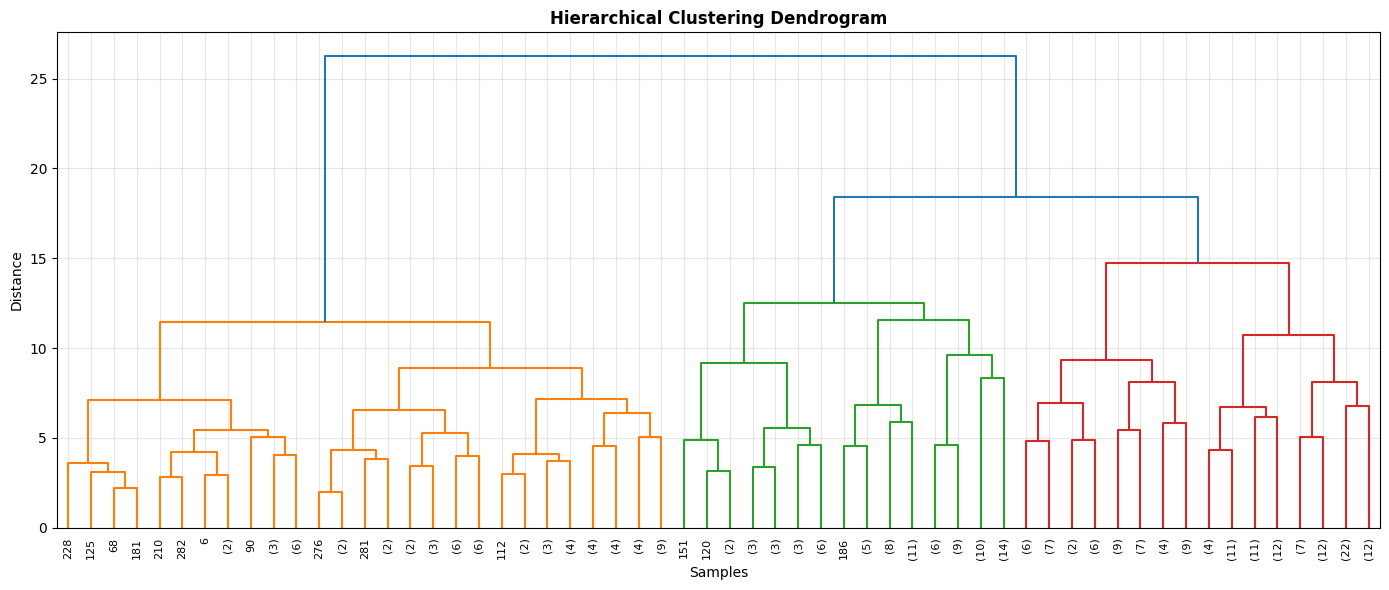

Hierarchical clustering completed!


In [4]:
# Step 2: Hierarchical Clustering (Dendrogram)
print("Step 2: Performing Hierarchical Clustering (Dendrogram)...")

# Compute linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 6))
plt.title('Hierarchical Clustering Dendrogram', fontweight='bold')
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='level', p=5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Choose number of clusters from dendrogram (use optimal_k from KMeans step)
clusters_hier = fcluster(Z, t=optimal_k, criterion='maxclust')

print("Hierarchical clustering completed!")


Step 3: Comparing clusters with actual labels...
K-Means Evaluation:
  Adjusted Rand Index (ARI): 0.2492
  Normalized Mutual Information (NMI): 0.1889
Hierarchical Clustering Evaluation:
  Adjusted Rand Index (ARI): 0.2222
  Normalized Mutual Information (NMI): 0.2267


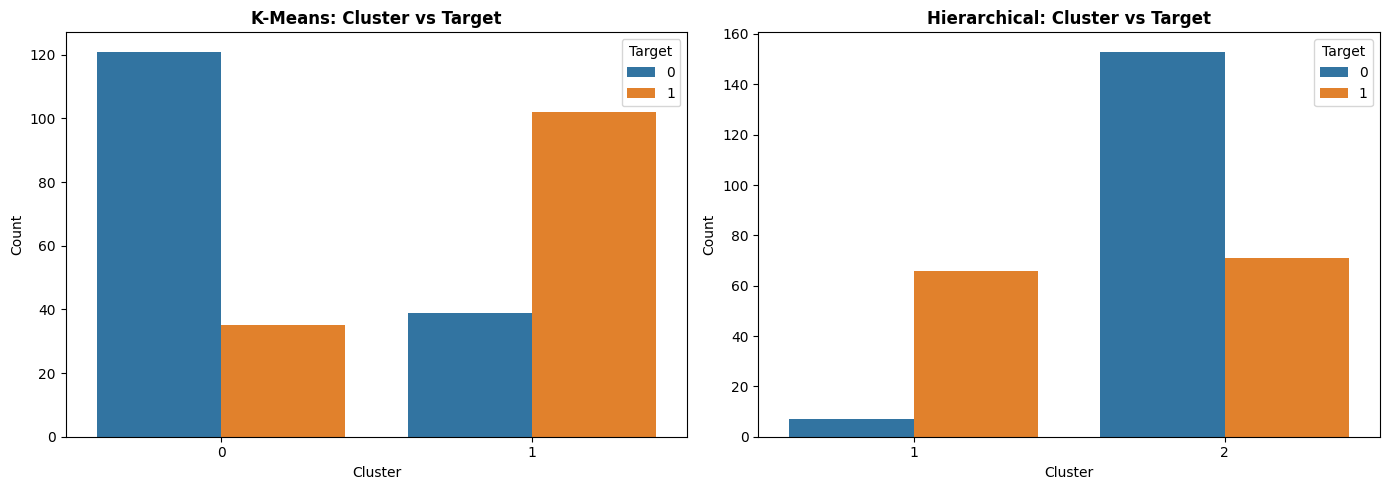

Cluster comparison completed!


In [5]:
# Step 3: Compare clusters with actual disease labels
print("Step 3: Comparing clusters with actual labels...")

# Add cluster labels to DataFrame
df_clusters = df_encoded.copy()
df_clusters['cluster_kmeans'] = clusters_kmeans
df_clusters['cluster_hier'] = clusters_hier

# Compute evaluation metrics (Adjusted Rand Index, Normalized Mutual Information)
ari_kmeans = adjusted_rand_score(y, clusters_kmeans)
nmi_kmeans = normalized_mutual_info_score(y, clusters_kmeans)
ari_hier = adjusted_rand_score(y, clusters_hier)
nmi_hier = normalized_mutual_info_score(y, clusters_hier)

print("K-Means Evaluation:")
print(f"  Adjusted Rand Index (ARI): {ari_kmeans:.4f}")
print(f"  Normalized Mutual Information (NMI): {nmi_kmeans:.4f}")

print("Hierarchical Clustering Evaluation:")
print(f"  Adjusted Rand Index (ARI): {ari_hier:.4f}")
print(f"  Normalized Mutual Information (NMI): {nmi_hier:.4f}")

# Visualize cluster vs label (count plot)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='cluster_kmeans', hue='target_binary', data=df_clusters, ax=axes[0])
axes[0].set_title('K-Means: Cluster vs Target', fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Count')
axes[0].legend(title='Target')

sns.countplot(x='cluster_hier', hue='target_binary', data=df_clusters, ax=axes[1])
axes[1].set_title('Hierarchical: Cluster vs Target', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].legend(title='Target')

plt.tight_layout()
plt.show()

print("Cluster comparison completed!")


In [6]:
# Summary
print("=== Unsupervised Learning - Clustering Complete ===")
print(f"✅ Step 1: Applied K-Means (elbow + silhouette). Optimal K = {optimal_k}")
print(f"✅ Step 2: Performed Hierarchical clustering with dendrogram analysis")
print(f"✅ Step 3: Compared clusters with actual labels (ARI & NMI)")
print()
print("K-Means vs Target:")
print(f"- ARI: {ari_kmeans:.4f}")
print(f"- NMI: {nmi_kmeans:.4f}")
print("Hierarchical vs Target:")
print(f"- ARI: {ari_hier:.4f}")
print(f"- NMI: {nmi_hier:.4f}")
print()
print("✅ Deliverable: Clustering models with visualized results completed!")


=== Unsupervised Learning - Clustering Complete ===
✅ Step 1: Applied K-Means (elbow + silhouette). Optimal K = 2
✅ Step 2: Performed Hierarchical clustering with dendrogram analysis
✅ Step 3: Compared clusters with actual labels (ARI & NMI)

K-Means vs Target:
- ARI: 0.2492
- NMI: 0.1889
Hierarchical vs Target:
- ARI: 0.2222
- NMI: 0.2267

✅ Deliverable: Clustering models with visualized results completed!


## Deliverables Completed

### ✅ Step 1: Apply K-Means Clustering (elbow method to determine K)
- Applied K-Means with elbow method and silhouette analysis
- Tested K values from 2 to 10
- Selected optimal K based on silhouette score
- Fitted final K-Means model with optimal clusters

### ✅ Step 2: Perform Hierarchical Clustering (dendrogram analysis)
- Computed linkage matrix using Ward method
- Created dendrogram visualization for cluster analysis
- Assigned cluster labels using optimal K from K-Means
- Analyzed hierarchical structure of the data

### ✅ Step 3: Compare clusters with actual disease labels
- Added cluster labels to the dataset
- Computed evaluation metrics:
  - **Adjusted Rand Index (ARI)**: Measures cluster-label agreement
  - **Normalized Mutual Information (NMI)**: Measures information shared between clusters and labels
- Created visualizations comparing cluster assignments with actual disease labels

### ✅ Deliverable: Clustering models with visualized results
- **K-Means clustering model** with optimal K clusters
- **Hierarchical clustering model** with dendrogram analysis
- **Comprehensive visualizations**:
  - Elbow method plot (K vs Inertia)
  - Silhouette score plot (K vs Score)
  - Hierarchical clustering dendrogram
  - Cluster vs target label count plots for both methods
- **Performance evaluation** with ARI and NMI metrics
- **Ready for further analysis** and model comparison
